In [1]:
%sc
!conda install -c condaforge keras --yes

Solving environment: / 
requested channel with url: https://conda.anaconda.org/condaforge

It is possible you have given conda an invalid channel. Please double-check
your conda configuration using `conda config --show`.

If the requested url is in fact a valid conda channel, please request that the
channel administrator create `noarch/repodata.json` and associated
`noarch/repodata.json.bz2` files, even if `noarch/repodata.json` is empty.
$ mkdir noarch
$ echo '{}' > noarch/repodata.json
$ bzip2 -k noarch/repodata.json
done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - keras


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    gast-0.2.0                 |

In [5]:
%sc
!conda install -c condaforge mxnet --yes

Solving environment: - 
requested channel with url: https://conda.anaconda.org/condaforge

It is possible you have given conda an invalid channel. Please double-check
your conda configuration using `conda config --show`.

If the requested url is in fact a valid conda channel, please request that the
channel administrator create `noarch/repodata.json` and associated
`noarch/repodata.json.bz2` files, even if `noarch/repodata.json` is empty.
$ mkdir noarch
$ echo '{}' > noarch/repodata.json
$ bzip2 -k noarch/repodata.json
done


==> WARNING: A newer version of conda exists. <==
  current version: 4.4.10
  latest version: 4.5.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - mxnet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    mkl-2018.0.2               |

In [6]:
import numpy as np
import pandas as pd
from utils.utils import PROJECT_DATA_DIR
import os
#import mxnet as mx
import tarfile
import warnings
from deep_learning_keras import plot_loss, train_model
warnings.filterwarnings("ignore")

In [7]:
bucket = 'ppi.ai'
PROJECT_DATA_DIR = 's3://{}'.format(bucket)

In [10]:
sensor_train = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                        'all_training_400_norm.csv'), 
                           sep='\s+', header=None)

sensor_test = pd.read_csv(os.path.join(PROJECT_DATA_DIR, 
                                       'all_test_400_norm.csv'),
                          sep='\s+', header=None)

In [11]:
sensor_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-0.883571,-2.231687,-3.080833,-0.511307,-1.799623,-2.150465,0.233222,1.224827,-2.416284,4.328132,...,-0.511307,-0.503430,0.374823,-0.883571,-0.935495,0.109003,-0.511307,-0.071366,-0.023907,7.0
1,-0.200017,0.321630,0.006774,-0.005054,0.321630,-0.080973,-0.135030,0.208314,0.072584,-0.005054,...,-0.005054,-0.018316,0.006774,-0.005054,-0.131631,0.094521,-0.005054,0.208314,0.006774,8.0
2,0.162494,0.073363,-0.361541,0.078078,0.131716,-0.265555,0.027428,0.058775,-0.183281,0.027428,...,0.010545,0.015011,-0.128432,0.078078,-0.014165,-0.046159,0.145611,-0.028754,-0.087296,-1.0
3,-0.135030,-0.358262,-0.080973,-0.005054,-0.471577,-0.037100,0.319884,-0.018316,-0.015163,0.189909,...,-0.265005,-0.131631,-0.015163,-0.135030,-0.018316,-0.037100,-0.005054,0.208314,0.006774,8.0
4,-0.005054,-0.018316,0.160331,-0.265005,-0.018316,0.006774,-0.005054,-0.358262,-0.015163,-0.005054,...,-0.135030,-0.018316,0.028711,-0.005054,-0.018316,0.006774,-0.200017,-0.018316,-0.015163,8.0


In [12]:
sensor_test.head()

,0,1,2,3,4,5,6,7,8,9,...,1191,1192,1193,1194,1195,1196,1197,1198,1199,1200
0,-0.132201,-0.108635,-0.877529,0.062900,-0.302037,-1.285610,0.023880,-2.912972,-0.900200,0.687224,...,3.262562,0.181469,-1.353623,2.677258,1.148482,-2.351155,0.336042,1.148482,-1.943074,2.0
1,0.255780,-0.932933,-0.333661,-0.297920,-0.751893,0.454952,-0.482487,-0.027736,0.914977,-0.297920,...,-0.113354,-0.027736,0.389234,0.255780,-0.027736,0.454952,-0.113354,-0.027736,0.192081,1.0
2,-1.013398,-0.055543,-0.644527,0.088401,-1.536551,0.081540,0.088401,-0.055543,-0.079808,-0.737948,...,0.088401,-0.055543,0.081540,-0.737948,-0.055543,0.081540,-0.737948,1.055213,0.081540,5.0
3,0.062900,-0.011934,0.006647,0.140940,-0.398739,0.029318,0.023880,0.278170,0.120003,0.023880,...,0.023880,-0.011934,0.006647,-0.054161,-0.011934,-0.016024,-0.054161,0.278170,-0.129380,-1.0
4,-0.667054,-0.027736,2.557922,-0.482487,0.334343,2.032179,-0.113354,0.334343,1.637872,-0.113354,...,-0.113354,-0.570854,0.717823,-0.482487,-0.027736,0.717823,-0.482487,0.334343,0.783541,-1.0


In [13]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 7.,  8., -1.,  4.,  6.,  1.,  5.,  2.,  3.,  9.,  0.])

In [14]:
sensor_train[sensor_train.columns[-1]].unique()

array([ 7.,  8., -1.,  4.,  6.,  1.,  5.,  2.,  3.,  9.,  0.])

In [15]:
sensor_test[sensor_test.columns[-1]].unique()

array([ 2.,  1.,  5., -1.,  0.,  8.,  9.,  4.,  6.,  7.,  3.])

In [16]:
ytrain = sensor_train[sensor_train.columns[-1]]
#ytrain.head()
xtrain = sensor_train.drop(sensor_train.columns[-1], axis=1) 

In [17]:
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,-0.883571,-2.231687,-3.080833,-0.511307,-1.799623,-2.150465,0.233222,1.224827,-2.416284,4.328132,...,0.241913,-0.511307,-0.503430,0.374823,-0.883571,-0.935495,0.109003,-0.511307,-0.071366,-0.023907
1,-0.200017,0.321630,0.006774,-0.005054,0.321630,-0.080973,-0.135030,0.208314,0.072584,-0.005054,...,0.094521,-0.005054,-0.018316,0.006774,-0.005054,-0.131631,0.094521,-0.005054,0.208314,0.006774
2,0.162494,0.073363,-0.361541,0.078078,0.131716,-0.265555,0.027428,0.058775,-0.183281,0.027428,...,-0.128432,0.010545,0.015011,-0.128432,0.078078,-0.014165,-0.046159,0.145611,-0.028754,-0.087296
3,-0.135030,-0.358262,-0.080973,-0.005054,-0.471577,-0.037100,0.319884,-0.018316,-0.015163,0.189909,...,-0.102910,-0.265005,-0.131631,-0.015163,-0.135030,-0.018316,-0.037100,-0.005054,0.208314,0.006774
4,-0.005054,-0.018316,0.160331,-0.265005,-0.018316,0.006774,-0.005054,-0.358262,-0.015163,-0.005054,...,0.006774,-0.135030,-0.018316,0.028711,-0.005054,-0.018316,0.006774,-0.200017,-0.018316,-0.015163


In [18]:
ytest = sensor_test[sensor_test.columns[-1]]
xtest = sensor_test.drop(sensor_test.columns[-1], axis=1) 

In [19]:
#ytrain_sc = ytrain.map(lambda x: 1 if (x == 1) else 0)
#ytest_sc = ytest.map(lambda x: 1 if (x == 1) else 0)
ytrain_sc = ytrain
ytest_sc = ytest

In [20]:
print(ytrain_sc.unique())
ytrain_sc.head()


[ 7.  8. -1.  4.  6.  1.  5.  2.  3.  9.  0.]


0    7.0
1    8.0
2   -1.0
3    8.0
4    8.0
Name: 1200, dtype: float64

## Preprocessing

In [21]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91104 entries, 0 to 91103
Columns: 1200 entries, 0 to 1199
dtypes: float64(1200)
memory usage: 834.1 MB


In [22]:
print(xtrain.shape)
xtrain.describe()

(91104, 1200)


,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
count,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,...,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000,91104.000000
mean,0.000245,0.001135,0.001039,0.002558,-0.000480,-0.000883,0.002567,-0.000847,-0.002251,0.001978,...,-0.002884,0.000945,0.000457,0.000659,-0.000650,0.001028,0.003428,0.000221,0.001655,0.003227
std,1.024659,1.019319,1.015030,1.018932,0.994452,1.011735,1.004725,1.003300,1.011457,0.999984,...,1.014925,0.992771,1.026006,1.025159,1.002439,1.004692,1.022386,0.998864,1.003199,1.019809
min,-48.712593,-33.549909,-25.439867,-48.712593,-33.549909,-20.377450,-35.002741,-33.549909,-20.377450,-35.002741,...,-25.439867,-35.002741,-29.088347,-25.439867,-48.712593,-33.549909,-25.439867,-35.002741,-33.549909,-20.377450
25%,-0.171222,-0.131631,-0.136508,-0.168308,-0.131631,-0.136508,-0.171222,-0.131631,-0.136508,-0.184517,...,-0.136508,-0.184517,-0.131631,-0.136508,-0.184517,-0.131631,-0.136508,-0.171222,-0.131631,-0.136508
50%,0.010545,-0.018316,-0.014502,0.010545,-0.018316,-0.014502,0.010545,-0.018316,-0.014502,0.010545,...,-0.014502,0.010545,-0.018316,-0.014502,0.010545,-0.018316,-0.014502,0.010545,-0.018316,-0.014502
75%,0.189909,0.208314,0.109003,0.189909,0.208314,0.109003,0.189909,0.208314,0.109003,0.189909,...,0.109003,0.189909,0.208314,0.109003,0.189909,0.208314,0.109003,0.189909,0.208314,0.109003
max,17.476632,51.206423,24.466261,19.426263,43.421728,24.466261,19.426263,51.206423,24.466261,19.426263,...,24.466261,17.476632,51.206423,24.466261,17.216681,51.206423,24.466261,17.476632,43.421728,24.466261


In [23]:
import matplotlib.pyplot as plt

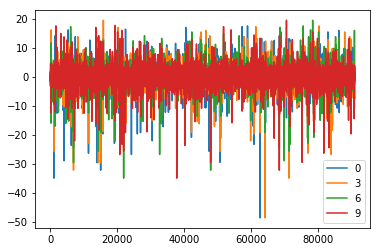

In [24]:
xtrain[xtrain.columns[0:10:3]].plot()
plt.show()

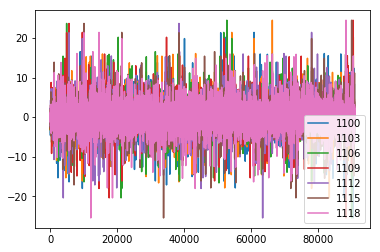

In [25]:
xtrain[xtrain.columns[1100:1120:3]].plot()
plt.show()

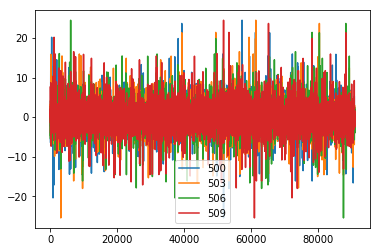

In [26]:
xtrain[xtrain.columns[500:510:3]].plot()
plt.show()

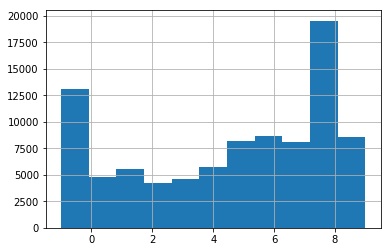

In [27]:
ytrain_sc.hist(bins=11)
plt.show()

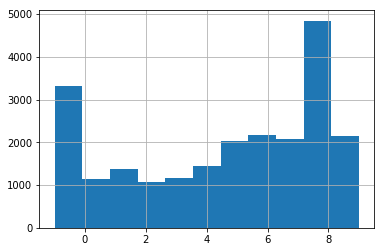

In [28]:
ytest_sc.hist(bins=11)
plt.show()

## Rearrange to (x, y, z)

In [21]:
#xtest_reshape = xtest.values.reshape(-1, 3)
#print(xtest_reshape)
#print(xtest_reshape.shape)
#print(xtest.shape)

[[ 1 -1 -1]
 [ 0  2 -1]
 [-2  2  1]
 ...
 [-4  0 64]
 [-4 -3 35]
 [-3  0 11]]
(9110400, 3)
(22776, 1200)


In [22]:
#xtrain_reshape = xtrain.values.reshape(-1, 3)

## Scaling and transforming data

In [23]:
print(ytrain_sc.values+1)

[ 9  8  5 ...  2  9 10]


In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras import optimizers
from sklearn.metrics import f1_score

In [38]:
y_cat_train = keras.utils.to_categorical(ytrain_sc.values + 1, num_classes=11)
y_cat_test = keras.utils.to_categorical(ytest_sc.values + 1, num_classes=11)
print(y_cat_test)
for i in range(20):
    print('{} {}'.format(i, y_cat_test[i]))
for i in range(20):
    print('{} {}'.format(i, ytest_sc.values[i]))


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
0 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
6 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
11 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
12 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
13 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
15 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
16 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
17 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
18 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
19 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0 2.0
1 1.0
2 5.0
3 -1.0
4 -1.0
5 5.0
6 5.0
7 0.0
8 1.0
9 -1.0
10 8.0
11 8.0
12 -1.0
13 -1.0
1

### Preprocessing

In [26]:
#from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [27]:
#scaler = QuantileTransformer(output_distribution='normal')
#xtrain_sc = scaler.fit_transform(xtrain_reshape)
#xtest_sc = scaler.transform(xtest_reshape)

In [29]:
xtrain_sc_reshape = xtrain.values.reshape(-1, 400, 3)
xtest_sc_reshape = xtest.values.reshape(-1, 400, 3)

In [30]:
print(ytrain_sc.shape)
print(xtrain_sc_reshape.shape)
type(xtrain_sc_reshape)
print(xtest_sc_reshape.shape)
print(ytest.shape)


(91104,)
(91104, 400, 3)
(22776, 400, 3)
(22776,)


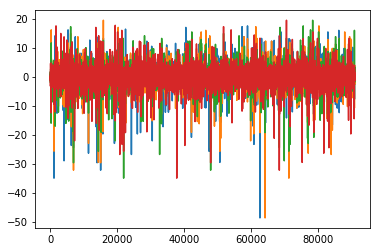

In [31]:
plt.plot(xtrain_sc_reshape[:,0:4:1,0])
plt.show()


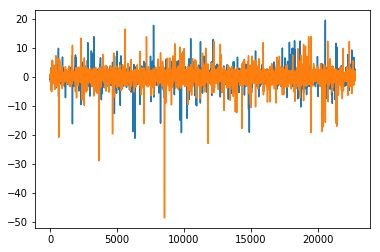

In [32]:
plt.plot(xtest_sc_reshape[:,0:4:3, 0])
plt.show()

## Model

In [42]:
from keras.utils import multi_gpu_model

In [35]:
#del model
model = Sequential()
model.add(BatchNormalization(input_shape=(400, 3)))
model.add(LSTM(units=20, input_shape=(400, 3),
               return_sequences=True))
model.add(Dropout(0.4))
model.add(BatchNormalization(input_shape=(400, 3)))
model.add(LSTM(20))
model.add(Dropout(0.4))
model.add(BatchNormalization(input_shape=(400, 3)))
model.add(Dense(units=11, activation='softmax'))


In [43]:
model = multi_gpu_model(model, gpus=8)

ValueError: To call `multi_gpu_model` with `gpus=8`, we expect the following devices to be available: ['/cpu:0', '/gpu:0', '/gpu:1', '/gpu:2', '/gpu:3', '/gpu:4', '/gpu:5', '/gpu:6', '/gpu:7']. However this machine only has: ['/cpu:0']. Try reducing `gpus`.

In [36]:
lr = 0.001
optim = optimizers.Adam(lr=lr,
                        beta_1=0.9,
                        beta_2=0.999,
                        decay=1e-6)
model.compile(loss='categorical_crossentropy',
                        optimizer=optim,
                        metrics=['accuracy'])

In [39]:
#reduce_lr = RedureLROnPlateau(monitor='val_loss', 
#                              factor=0.2,
#                              patience=5, 
#                              min_lr=0.00001,
#                              verbose=2)

history = model.fit(xtrain_sc_reshape,
                    y_cat_train,                        
                    epochs=20,
                    batch_size=2**8, 
                    validation_data=(xtest_sc_reshape, 
                                     y_cat_test), 
                    shuffle=False, 
                    #callbacks=[reduce_lr]
                   )

Train on 91104 samples, validate on 22776 samples
Epoch 1/20
91104/91104 [==============================] - 238s 3ms/step - loss: 1.8981 - acc: 0.3411 - val_loss: 1.3020 - val_acc: 0.5436
Epoch 2/20
91104/91104 [==============================] - 237s 3ms/step - loss: 1.7039 - acc: 0.3679 - val_loss: 1.4046 - val_acc: 0.4398
Epoch 3/20
11264/91104 [==>...........................] - ETA: 3:17 - loss: 1.4701 - acc: 0.4398

KeyboardInterrupt: 

In [35]:
pred_train = model.predict_classes(xtrain_sc_reshape)
pred_test = model.predict_classes(xtest_sc_reshape)
print(pred_test)
print('')
print('unique values train data set', np.unique(pred_train))
print('unique values test data set:', np.unique(pred_test))
print('')


22776/22776 [==============================] - 151s   
[ 9  7  6 ... 10  4  9]

unique values train data set [ 0  1  2  3  4  5  6  7  8  9 10]
unique values test data set: [ 0  1  2  3  4  5  6  7  8  9 10]



In [36]:
print('training score:', f1_score(ytrain_sc.values + 1, pred_train, average=None))
print('test score:', f1_score(ytest_sc.values + 1, pred_test, average=None))

training score: [0.66488033 0.83531022 0.76888173 0.9225385  0.88153271 1.
 0.83785215 1.         1.         0.99877651 0.98726636]
test score: [0.65941077 0.84635879 0.78086957 0.92465448 0.88329718 1.
 0.83368421 1.         1.         0.99895898 0.988059  ]


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
print(classification_report(ytest_sc+1, pred_test))

             precision    recall  f1-score   support

          0       0.83      0.54      0.66      3224
          1       0.91      0.79      0.85      1202
          2       0.66      0.96      0.78      1401
          3       0.91      0.94      0.92      1103
          4       0.92      0.85      0.88      1196
          5       1.00      1.00      1.00      1465
          6       0.73      0.97      0.83      2044
          7       1.00      1.00      1.00      2162
          8       1.00      1.00      1.00      2046
          9       1.00      1.00      1.00      4798
         10       0.99      0.99      0.99      2135

avg / total       0.92      0.91      0.90     22776



In [39]:
print(confusion_matrix(ytest_sc+1, pred_test))

[[1757   76  702    2    8    0  646    0    0    7   26]
 [ 248  953    0    1    0    0    0    0    0    0    0]
 [  50    0 1347    0    0    0    1    0    0    3    0]
 [   0   18    0 1037   48    0    0    0    0    0    0]
 [   2    0    0   97 1018    0   79    0    0    0    0]
 [   0    0    0    0    0 1465    0    0    0    0    0]
 [  26    0    0    3   35    0 1980    0    0    0    0]
 [   0    0    0    0    0    0    0 2162    0    0    0]
 [   0    0    0    0    0    0    0    0 2046    0    0]
 [   0    0    0    0    0    0    0    0    0 4798    0]
 [  22    3    0    0    0    0    0    0    0    0 2110]]


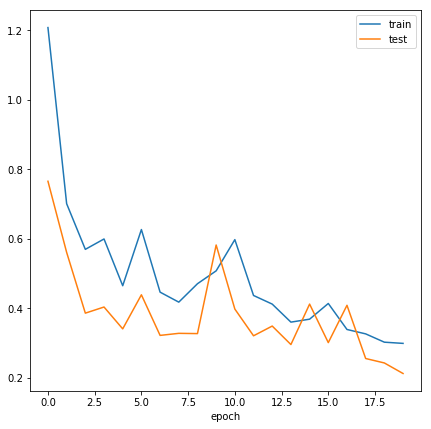

In [40]:
plot_loss(history)